# POLI 175 - Lecture 16

## Regularization II and Non-linearity I

## Announcement

- Problem Set 03 will be on later this week!

- This lecture's participation quiz is on.

- The lecture quiz is on for this, the previous, and the next lectures.

- Problem Set 02 is hard. PS 03 is even harder. Please reach out if you need help.

## Class Examples

- Education expenditure dataset

- Pinochet voting dataset

Let us load them all:

In [1]:
## Loading the relevant packages
import pandas as pd
import numpy as np

# Plotting things:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading scikit learn relevant packages (note our new friends!)
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, get_scorer_names, mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
## Education Expenditure Dataset
educ = pd.read_csv('https://raw.githubusercontent.com/umbertomig/POLI175public/main/data/educexp.csv')
educ = educ.set_index('states')
for i in educ.columns:
    educ[i + '_log'] = np.log(educ[i])

raws = ['income', 'young', 'urban']
y = educ['education']
X = educ.reset_index()[raws]
Xraws = educ.reset_index()[raws]
for power in range(2, 4):
    for var in raws:
        X[var + '_' + str(power)] = X[[var]] ** power
        
## Standardizing the X variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# First observation:
print(list(X.iloc[0]))
print(list(X_scaled[0])) 
X.head()

[2824.0, 350.7, 508.0, 7974976.0, 122990.48999999999, 258064.0, 22521332224.0, 43132764.842999995, 131096512.0]
[-0.7236935623908923, -0.3450642975121714, -1.044417328024432, -0.7523179270273195, -0.3599514179092925, -1.03909576213098, -0.7617030030625055, -0.37201867365836544, -0.9953964232882246]


,income,young,urban,income_2,young_2,urban_2,income_3,young_3,urban_3
0,2824,350.7,508,7974976,122990.49,258064,22521332224,4.313276e+07,131096512
1,3259,345.9,564,10621081,119646.81,318096,34614102979,4.138583e+07,179406144
2,3072,348.5,322,9437184,121452.25,103684,28991029248,4.232611e+07,33386248
3,3835,335.3,846,14707225,112426.09,715716,56402207875,3.769647e+07,605495736
4,3549,327.1,871,12595401,106994.41,758641,44701078149,3.499787e+07,660776311


# Linear Model Selection and Regularization

- In this class, we are going to focus on two of the most used methods for model selection:
    + **Ridge**
    + **Lasso**

- These methods are different from the subset selection in special ways:
    + They are meant to "*shrink*" the coefficients toward zero!

- It may be counter-intuitive, but these methods are great tools to reduce the variance of the estimates (recall the bias-variance trade-offs).

# Lasso Regression

## Lasso Regression

- Ridge regression has one disadvantage: it always include $p$ predictors.

- The shrinkage never sets coefficients to be exactly zero (that is, be removed from the prediction).

- This could potentially make subset selection better than ridge.

## Lasso Regression

- But one alternative, using the same principles as the ridge regression is the **lasso** regression.

- In the lasso regression, the objective function becomes:

$$ RSS + \alpha \sum_{j=1}^p|\beta_j| $$

- Does the same as ridge: the larger the $\alpha$, the more the *shrinkage*.

## Lasso Regression

- Unlike ridge, for some values of $\alpha$, **lasso** actually force coefficients to be exactly equal to zero.

- Thus, **lasso** performs variable selection, much like the subset selection models we have seen.

- **Side-effect**: Makes models easier to interpret!
    + Yields *sparse* models: models that only involve a subset of the variables.
    
- Like ridge, selecting a good $\alpha$ is critical.

The R-squared for this regression is: 0.7505141127635888


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+04, tolerance: 1.079e+01
  model = cd_fast.enet_coordinate_descent(


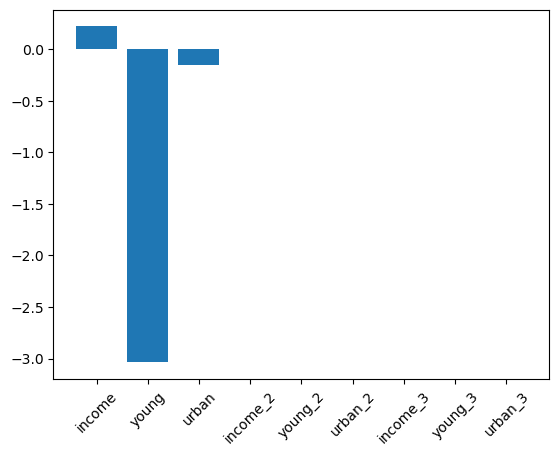

In [3]:
## Lasso Regression (badly done)
lasso = Lasso(alpha = 1).fit(X, y)
print('The R-squared for this regression is: ' + str(lasso.score(X, y)))
plt.bar(X.columns, lasso.coef_)
plt.xticks(rotation=45)
plt.show()

The R-squared for this regression is: 0.6965025797685898


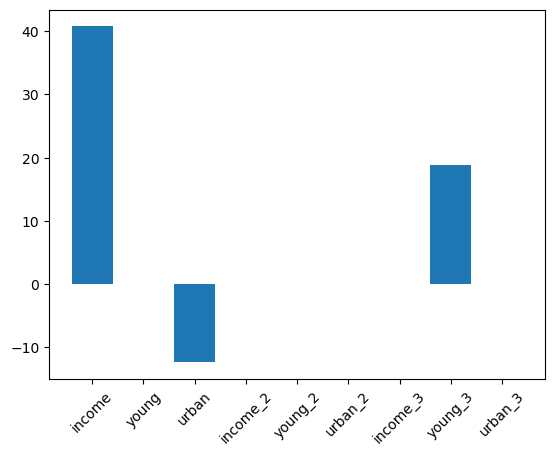

196.31372549019608
196.31372549019608


In [10]:
## Lasso Regression (greatly done)
lasso = Lasso(alpha = 1).fit(X_scaled, y)
print('The R-squared for this regression is: ' + str(lasso.score(X_scaled, y)))
plt.bar(X.columns, lasso.coef_)
plt.xticks(rotation=45)
plt.show()
print(lasso.intercept_)
print(np.mean(y))

## Lasso (the book calls the regularization parameter $\lambda$) 

![img](../img/lasso1.png)

In [5]:
## Example by Kornel Kielczewski in the sklearn Ridge documentation, adapted by me.
lasso = Lasso(max_iter = 20000000)
coefs = list()
errors = list()
alphas = np.logspace(-6, 6, 200)

for a in alphas:
    lasso.set_params(alpha = a).fit(X_scaled, y)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_scaled) - y) ** 2))

coefs = pd.DataFrame(coefs, columns = X.columns, index = alphas)
print(errors[0:5])
coefs.head()

[496.7391981233972, 496.73919989324065, 496.73920222958094, 496.73920531374625, 496.7392093851063]


,income,young,urban,income_2,young_2,urban_2,income_3,young_3,urban_3
0.000001,-66.792132,-2038.536608,210.834245,383.886449,3912.272581,-541.632507,-276.160246,-1856.260174,318.797890
0.000001,-66.787782,-2038.347428,210.826610,383.875788,3911.896663,-541.615738,-276.154241,-1856.072990,318.788988
0.000001,-66.782784,-2038.130069,210.817838,383.863538,3911.464753,-541.596470,-276.147341,-1855.857924,318.778759
0.000002,-66.777042,-2037.880335,210.807758,383.849464,3910.968512,-541.574333,-276.139413,-1855.610825,318.767006
0.000002,-66.770444,-2037.593404,210.796178,383.833293,3910.398355,-541.548899,-276.130305,-1855.326921,318.753503


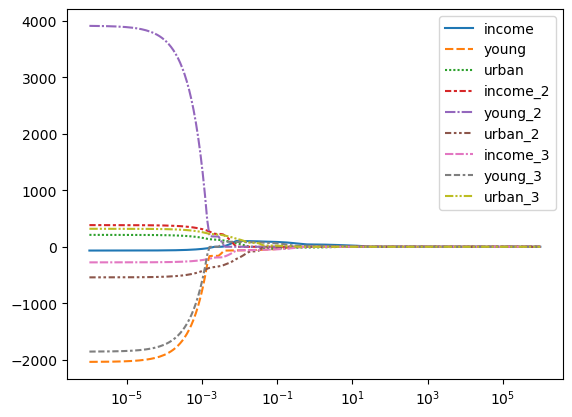

In [6]:
# Lasso coefficients as a function of the regularization paramenter alpha
g = sns.lineplot(data = coefs)
g.set(xscale='log')
plt.show()

In [11]:
# Lasso Mean Squared Error as a function of the regularization paramenter alpha
g = sns.lineplot(x = alphas, y = errors)
g.set(xscale='log')
plt.show()

NameError: name 'alphas' is not defined

## Lasso x Ridge Regression (the book calls the regularization parameter $\lambda$) 

- Selection property of lasso: 
    + Lasso and ridge are equivalent to a constraint on the shape of the acceptable parameter space.
    + But the "diamond shape" of lasso makes it shrinks some coefficients towards zero.

![img](../img/lassovsridge3.png)

## Lasso x Ridge Regression (the book calls the regularization parameter $\lambda$) 

- Lasso performs similarly to ridge in most cases. In these cases, I'd say that lasso is better:
    + Reduces the complexity in the model.

![img](../img/lassovsridge1.png)

## Lasso x Ridge Regression (the book calls the regularization parameter $\lambda$) 

- But when all coefficients are different from zero, then ridge is better.

![img](../img/lassovsridge2.png)

## Lasso x Ridge Regression

- To summarize, none is better in all situations.

- You may need to search which model is better.

- Moreover, finding $\alpha$ is also a big deal. Cross-validation can help us with that!


# Cross-Validation

## Cross-Validation

- To select the tuning parameters you can use cross-validation.

- The idea is to search through a grid of tuning parameter candidates, selecting the one that does best in the cross-validation.

- It is indeed a very straight-forward idea, if you think about it.

In [8]:
## Lasso with Cross-Validation
lasso = Lasso(max_iter = 20000000)
coefs = list()
errors = list()
CVerrors = list()
alphas = np.logspace(-6, 6, 200)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 12345)

for a in alphas:
    lasso.set_params(alpha = a).fit(X_train, y_train)
    CVerrors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))
    errors.append(np.mean((lasso.predict(X_train) - y_train) ** 2))

print('The alpha that minimizes the Lasso Cross-Validation MSE is: ' + str(alphas[CVerrors.index(min(CVerrors))]))
    
mses = pd.DataFrame({
    'trainMSE': errors,
    'testMSE': CVerrors}, index = alphas)

The alpha that minimizes the Lasso Cross-Validation MSE is: 0.1011637979766207


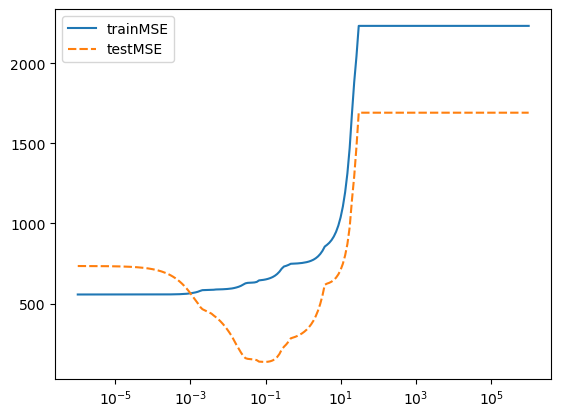

In [9]:
# Cross Validation Lasso MSE as a function of the regularization parameter alpha
g = sns.lineplot(data = mses)
g.set(xscale='log')
plt.show()

# Beyond Linearity I

## Beyond Linearity

- So far, we have focused on linear models.

- Most of the time, linear approximations are excellent:
    + Easy to interpret
    + Easy to run

- And all the GLM flavors afford lots of flexibility regarding how we deal with data.

- In the following two lectures, we relax the linearity assumption but keep it as simple as possible.

## Polynomial Regression

- Expands the default model ($y_i = \beta_0 + \beta_1x_i + \varepsilon_i$) to consider a polynomial $d$:

$$ y_i = \beta_0 + \beta_1x_i + \beta_2x_i^2 +\cdots + \beta_dx_i^d + \varepsilon_i $$
                     
- Lots of flexibility here, but we seldom use $d>4$ because then it gets *excessively* flexible.

- Prediction very straightforward:

$$ \hat{f}(x_0) = \hat{\beta}_0 + \hat{\beta}_1x_0 + \hat{\beta}_2x_0^2 +\cdots + \hat{\beta}_dx_0^d $$

## Polynomial Regression

![img](../img/polyreg1.png)

## Polynomial Regression

In [10]:
## Create the polynomials (with interaction terms!)
poly = PolynomialFeatures(degree = 4)
X = educ.reset_index()['income'].to_frame()
X = poly.fit_transform(X)
print(list(poly.get_feature_names_out(['income'])))

['1', 'income', 'income^2', 'income^3', 'income^4']


In [11]:
## Fit a linear regression
reg = LinearRegression().fit(X, y)
print('The MSE for a quartic polynomial is: ' + str(np.mean((reg.predict(X) - y) ** 2)))

The MSE for a quartic polynomial is: 1157.9289247888587


In [12]:
# For the fully-specified model (lots of interactions...)
poly = PolynomialFeatures(degree = 4)
X = educ.reset_index()[['income', 'urban', 'young']]
X = poly.fit_transform(X)
print(list(poly.get_feature_names_out(['income', 'urban', 'young'])))
## Fit a linear regression
reg = LinearRegression().fit(X, y)
print('\n\nThe MSE for a quartic polynomial on income, urban, and \nyoung + interactions, is: ' + str(np.mean((reg.predict(X) - y) ** 2)))

['1', 'income', 'urban', 'young', 'income^2', 'income urban', 'income young', 'urban^2', 'urban young', 'young^2', 'income^3', 'income^2 urban', 'income^2 young', 'income urban^2', 'income urban young', 'income young^2', 'urban^3', 'urban^2 young', 'urban young^2', 'young^3', 'income^4', 'income^3 urban', 'income^3 young', 'income^2 urban^2', 'income^2 urban young', 'income^2 young^2', 'income urban^3', 'income urban^2 young', 'income urban young^2', 'income young^3', 'urban^4', 'urban^3 young', 'urban^2 young^2', 'urban young^3', 'young^4']


The MSE for a quartic polynomial on income, urban, and 
young + interactions, is: 839.7125065728393


In [13]:
## With cross-validation now

# Only income
X = educ.reset_index()['income'].to_frame()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12345)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
reg = LinearRegression().fit(X_train, y_train)
print('The CV-MSE for a quartic polynomial on income is: ' + str(np.mean((reg.predict(X_test) - y_test) ** 2)))

The CV-MSE for a quartic polynomial on income is: 976.9088666334937


In [14]:
## With cross-validation now

# For the fully-specified model (lots of interactions...)
X = educ.reset_index()[['income', 'urban', 'young']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12345)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
reg = LinearRegression().fit(X_train, y_train)
print('The CV-MSE for a quartic polynomial on income, urban, and \nyoung + interactions, is: ' + str(np.mean((reg.predict(X_test) - y_test) ** 2)))

The CV-MSE for a quartic polynomial on income, urban, and 
young + interactions, is: 3659358.495521982


## Piecewise-constant Regression

- Here, we would be breaks in the predictor, making it an ordered categorical variable instead of a continuous variable.

- Let a variable $X$, the indicator function $I(.)$, and a set of cutpoints $\{c_1, c_2, \cdots, c_k\}$. The stepped variable $X$, $C_j(X)$, becomes:

$$
\begin{align}
C_{0}(X) &= I(X < c_1) \\
C_{1}(X) &= I(c_1 \leq X < c_2) \\
C_{2}(X) &= I(c_2 \leq X < c_3) \\
&\vdots\\
C_{K-1}(X) &= I(c_{K-1} \leq X < c_K) \\
C_{K}(X) &= I(X \geq c_K)
\end{align}
$$

## Piecewise-constant Regression

- Example use: when age is defined in 5-years bins.

- Detail: $C_0(x_i) + C_1(x_i) + \cdots + C_K(x_i) = 1$. This would make adding all pieces impossible:
    + Perfect Collinearity.

- The regression model becomes:

$$ y_i = \beta_0 + \beta_1C_1(x_i) + \beta_2C_2(x_i) +\cdots + \beta_KC_K(x_i) + \varepsilon_i $$

## Piecewise-constant Regression

![img](../img/pcreg1.png)

## Piecewise-constant Regression

In [15]:
## Piecewise-constant Regression
X = educ.reset_index()['income'].to_frame()
X = pd.cut(X.income, bins = [0, 2500, 3000, 3200, 3500, 4000, 5000])
X = pd.get_dummies(X, drop_first = True)
reg = LinearRegression().fit(X, y)
print('The MSE for this piecewise constant regression is: ' + str(np.mean((reg.predict(X) - y) ** 2)))

The MSE for this piecewise constant regression is: 1138.5444810091867


In [16]:
## With cross-validation now
X = educ.reset_index()['income'].to_frame()
X = pd.cut(X.income, bins = [0, 2500, 3000, 3200, 3500, 4000, 5000])
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12345)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
reg = LinearRegression().fit(X_train, y_train)
print('The CV-MSE for this piecewise constant regression is: ' + str(np.mean((reg.predict(X_test) - y_test) ** 2)))

The CV-MSE for this piecewise constant regression is: 1241.6923076923076


# Questions?

# See you next class
